In [ ]:
!pip install imgviz ultralytics pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 55.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from os import listdir
from pathlib import Path
from shutil import copy
import argparse
import pandas as pd
from tqdm import tqdm

from ultralytics import YOLO

import os

import numpy as np
import imgviz
from PIL import Image
from numpy import asarray

from shutil import copy
from sklearn.model_selection import train_test_split

import argparse
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



# Анализ данных



In [ ]:
# ЭТО УЖЕ НЕ НАДО ЗАПУСКАТЬ, данные уже обработали и по папкам распределили

# #загрузка с платформы ODS
# !wget https://storage.yandexcloud.net/ds-ods/files/files/baf3b148/train.csv
# !wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__1.zip
# !wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__2.zip
# !wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__3.zip
# !wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__4.zip
# !wget https://storage.yandexcloud.net/ds-ods/files/files/b7208b30/check.zip

--2024-12-13 17:28:27--  https://storage.yandexcloud.net/ds-ods/files/files/baf3b148/train.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2979055 (2.8M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]   2.84M  1.77MB/s    in 1.6s    

2024-12-13 17:28:30 (1.77 MB/s) - ‘train.csv’ saved [2979055/2979055]

--2024-12-13 17:28:30--  https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__1.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1798294393 (1.7G) [application/zip]
Saving to: ‘train__1.zip’

tr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # ЭТО УЖЕ НЕ НАДО ЗАПУСКАТЬ, данные уже обработали и по папкам распределили

# import os
# import shutil

# shutil.move('/content/train.csv', '/content/drive/MyDrive/Я-профи/НТО хакатон 2025/train.csv')
# shutil.move('/content/train__1.zip', '/content/drive/MyDrive/Я-профи/НТО хакатон 2025/train__1.zip')
# shutil.move('/content/train__2.zip', '/content/drive/MyDrive/Я-профи/НТО хакатон 2025/train__2.zip')
# shutil.move('/content/train__3.zip', '/content/drive/MyDrive/Я-профи/НТО хакатон 2025/train__3.zip')
# shutil.move('/content/train__4.zip', '/content/drive/MyDrive/Я-профи/НТО хакатон 2025/train__4.zip')
# shutil.move('/content/check.zip', '/content/drive/MyDrive/Я-профи/НТО хакатон 2025/check.zip')

'/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/check.zip'

In [ ]:
os.chdir('/content/drive/My Drive/ODS_NTO/')
os.getcwd()

'/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024'

In [ ]:
os.listdir()

['train.csv',
 'train__1.zip',
 'train__2.zip',
 'train__3.zip',
 'train__4.zip',
 'check.zip']

In [ ]:
os.mkdir("data")
os.mkdir("data/train")
os.mkdir("tmp")

In [ ]:
os.listdir()

['train.csv',
 'train__1.zip',
 'train__2.zip',
 'train__3.zip',
 'train__4.zip',
 'check.zip',
 'data',
 'tmp']

In [ ]:
#распакоука
! unzip train__1.zip -d tmp
! unzip train__2.zip -d tmp
! unzip train__3.zip -d tmp
! unzip train__4.zip -d tmp

! unzip check.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: tmp/train__4/17887bf8f3e3be0311cb862afab13de2.JPG  
  inflating: tmp/train__4/178c8f2bd6c48952c662c9edef5410dc.JPG  
  inflating: tmp/train__4/17924f5823d2bfafbe011ccbd2254fc4.JPG  
  inflating: tmp/train__4/17971ccbbb04d46535f82629735eccd7.JPG  
  inflating: tmp/train__4/179ff8448adec893c0bc4972b378db22.JPG  
  inflating: tmp/train__4/17a313c941fd92f2a4a19a3c8815d4ec.JPG  
  inflating: tmp/train__4/17b3a4e33d9ed7cf4433539853a30867.JPG  
  inflating: tmp/train__4/17ba7dae0d97793eed5df1df00b2517d.JPG  
  inflating: tmp/train__4/17bfcf305552e6aa69edcab80f8c9ee7.JPG  
  inflating: tmp/train__4/17cad18f3316510d943aaa27712fcbc8.JPG  
  inflating: tmp/train__4/17d3e286ff350338bea201f10fe3f0c6.JPG  
  inflating: tmp/train__4/17df5931df841481764bb941c8a033ec.JPG  
  inflating: tmp/train__4/17e2b82ada2ca432eadd809e2eed3a51.JPG  
  inflating: tmp/train__4/17f5aee965867d7b8c200018727e37ce.JPG  
  inflating: tmp/train__4/1809b2174dbc8

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024'

In [ ]:
os.listdir('/content/drive/My Drive/ODS_NTO/tmp')

['train__1', 'train__2', 'train__3', 'train__4']

In [ ]:
len(os.listdir('/content/drive/My Drive/ODS_NTO/tmp'))

4

(22078, 2)

In [ ]:
# 5520+5520+5520+5518

22078

In [ ]:
# Перенесем все фотографии в data/train
train_path = "data/train"
data_path = "tmp"
for folder_name in os.listdir(data_path):
    print(folder_name)
    folder_path = os.path.join(data_path, folder_name)
    print(folder_path)
    print(len(os.listdir(folder_path)))
    for file_name in os.listdir(folder_path):
        src = os.path.join(folder_path, file_name)
        shutil.copy(src, train_path)

train__1
tmp/train__1
5520
train__2
tmp/train__2
5520
train__3
tmp/train__3
5520
train__4
tmp/train__4
5518


In [ ]:
# Проверим, что находится в tmp
print("Содержимое папки tmp:")
print(os.listdir("tmp"))

Содержимое папки tmp:
['train__1', 'train__2', 'train__3', 'train__4']


In [ ]:
print(len(os.listdir("data/train")))

22078


In [ ]:
# Перенесем train.csv в data/train
shutil.copyfile("train.csv", "data/train.csv")

'data/train.csv'

In [ ]:
print(os.listdir("data"))

['train', 'check', 'train.csv']


In [ ]:
# Загрузка csv файла с аннотациями.
# data/
# --- train/
#       --- 1.JPG
#       --- 2.JPG
# --- train.csv

In [ ]:
train_df_path = "data/train.csv"
train_images_dir = "data/train"

train_df = pd.read_csv(train_df_path)
train_df.head()

,image_name,detection
0,d4b681c636be92a99d2169685169ddce.JPG,4 0.5298713445663452 0.42401960492134094 0.253...
1,af429cc238c384111b2f6e4ace00638c.JPG,6 0.6738590002059937 0.6928213834762573 0.5684...
2,2329fe3d86fa593db201c3897ad74d4c.JPG,1 0.1510416716337204 0.463131308555603 0.23749...
3,309c121c529fb223e87ac1ea9d43073c.JPG,6 0.6556299924850464 0.7617244720458984 0.6808...
4,9060b55db1f35ce70948388b0e0158ba.JPG,5 0.7708333134651184 0.5369875431060791 0.4583...


In [ ]:
# Инициализация пустых списков для хранения меток и координат ограничивающих рамок
label_data = []
cx_data, cy_data, w_data, h_data = [], [], [], []

# Проход по каждой строке в обучающем наборе данных
for index, row in train_df.iterrows():
    # Каждая строка (row['detection']) содержит строку с боксами объектов, разделенными точкой с запятой
    for markup in row['detection'].split(";"):
        # Извлекаем метку и координаты ограничивающей рамки (центр x, центр y, ширина, высота)
        label, cx, cy, w, h = markup.split()

        # Преобразуем координаты из строки в число с плавающей точкой для дальнейших вычислений
        cx = float(cx)
        cy = float(cy)
        w = float(w)
        h = float(h)

        # Добавляем метку и координаты ограничивающей рамки в соответствующие списки
        label_data.append(label)
        cx_data.append(cx)
        cy_data.append(cy)
        w_data.append(w)
        h_data.append(h)

In [ ]:
# Определение минимального и максимального значений для ширины bounding box
width_data_min = np.min(w_data)
width_data_max = np.max(w_data)

# Определение минимального и максимального значений для высоты bounding box
height_data_min = np.min(h_data)
height_data_max = np.max(h_data)

# Вывод максимального и минимального значений для ширины и высоты bounding box
print(f"Высота bounding box максимальная {height_data_max} и минимальная {height_data_min}")
print(f"Ширина bounding box максимальная {width_data_max} и минимальная {width_data_min}")

Высота bounding box максимальная 1.0 и минимальная 0.0014204978942871094
Ширина bounding box максимальная 1.0 и минимальная 0.00146484375


Давайте посчитаем количество животных на изображении.

In [ ]:
def count_bbox(row):
    # Разделяем строку с аннотацией по символу ";", чтобы получить список bounding boxes
    # Возвращаем количество элементов в списке, что соответствует числу bounding boxes
    return len(row.split(";"))

In [ ]:
# Применение функции count_bbox к каждому элементу столбца "detection"
# Результат сохраняется в новом столбце "count_bbox"
train_df["count_bbox"] = train_df["detection"].apply(lambda x: count_bbox(x))
train_df

,image_name,detection,count_bbox
0,d4b681c636be92a99d2169685169ddce.JPG,4 0.5298713445663452 0.42401960492134094 0.253...,1
1,af429cc238c384111b2f6e4ace00638c.JPG,6 0.6738590002059937 0.6928213834762573 0.5684...,1
2,2329fe3d86fa593db201c3897ad74d4c.JPG,1 0.1510416716337204 0.463131308555603 0.23749...,1
3,309c121c529fb223e87ac1ea9d43073c.JPG,6 0.6556299924850464 0.7617244720458984 0.6808...,1
4,9060b55db1f35ce70948388b0e0158ba.JPG,5 0.7708333134651184 0.5369875431060791 0.4583...,1
...,...,...,...
22073,8a3b277cd4c1b7decf1c6c8073ec6106.JPG,0 0.5198410153388977 0.9816015362739563 0.0401...,1
22074,9d5226e34b630deb9cd7176ef7c3fd46.JPG,6 0.8394610285758972 0.5973711609840393 0.2205...,1
22075,88be38e8a669e47e4a8f6a78abcd7cf5.JPG,5 0.7143076062202454 0.5987077355384827 0.5707...,1
22076,1c471963b2c465d482c019941567b6d1.JPG,7 0.22023800015449524 0.8158365488052368 0.050...,3


In [ ]:
# Построение гистограммы для визуализации распределения количества bounding boxes
train_df["count_bbox"].value_counts()

,count
count_bbox,
1,18933
2,1873
3,596
4,301
5,180
6,72
7,58
8,34
9,17


In [ ]:
MAPPER = ['Заяц', 'Кабан', 'Кошки', 'Куньи', 'Медведь', 'Оленевые', 'Пантеры', 'Полорогие', 'Собачие', 'Сурок']

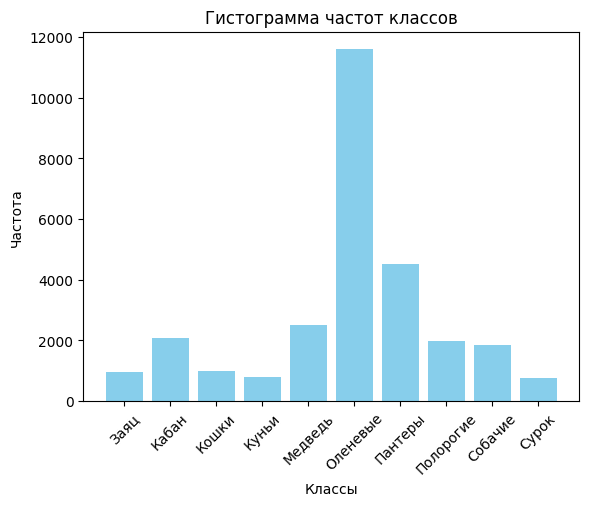

In [ ]:
# Подсчет частот каждого уникального класса в датасете
unique, counts = np.unique(label_data, return_counts=True)

# Преобразование меток классов в названия групп с помощью списка MAPPER
labels = []
for id in unique:
    labels.append(MAPPER[int(float(id))])

# Построение гистограммы частот классов
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Классы')  # Метка для оси X
plt.ylabel('Частота')  # Метка для оси Y
plt.title('Гистограмма частот классов')  # Заголовок графика
plt.xticks(labels, rotation=45)  # Установка меток на оси X с поворотом на 45 градусов для лучшей читаемости
plt.show()

# Baseline на основе Yolo
## Предподготовка данных для обучения модели для детекции
Для обучения модели Yolo необходимо разбить данные на обучающую и валидационные выборки.
Создать структуру для обучения

In [ ]:
def preprocess_markup_yolo(save_path, images_dir, file_name, split, markup):
    # Создаем необходимые директории, если они не существуют
    labels_dir = os.path.join(save_path, "labels", split)
    images_dir_dest = os.path.join(save_path, "images", split)
    os.makedirs(labels_dir, exist_ok=True)
    os.makedirs(images_dir_dest, exist_ok=True)

    # Обработка аннотаций
    yolo_markups = []
    for det in markup.split(";"):
        yolo_markups.append(f"{det}\n")

    # Сохраняем аннотации в файл
    label_file_path = os.path.join(labels_dir, file_name[:-4] + ".txt")
    with open(label_file_path, "w") as f:
        f.writelines(yolo_markups)

    # Копируем изображение в целевую папку
    image_source_path = os.path.join(images_dir, file_name)
    image_dest_path = os.path.join(images_dir_dest, file_name)
    copy(image_source_path, image_dest_path)

In [ ]:
def yolo_files_split(data_df_path, yolo_data_dir, images_data_dir):
    # Загружаем данные из CSV
    data_df: pd.DataFrame = pd.read_csv(data_df_path)

    # Разделяем на обучающие и валидационные данные
    data_df_train, data_df_val = train_test_split(data_df, test_size=0.33, random_state=42)

    # Обрабатываем обучающие данные
    for index, row in data_df_train.iterrows():
        preprocess_markup_yolo(yolo_data_dir, images_data_dir, row["image_name"], "train", row["detection"])

    # Обрабатываем валидационные данные
    for index, row in data_df_val.iterrows():
        preprocess_markup_yolo(yolo_data_dir, images_data_dir, row["image_name"], "val", row["detection"])

In [ ]:
data_df_path = "data/train.csv"
yolo_data_dir = "yolo/"
images_data_dir = "data/train"

In [ ]:
Path("yolo/images/train").mkdir(exist_ok=True, parents=True)
Path("yolo/images/val").mkdir(exist_ok=True, parents=True)
Path("yolo/labels/train").mkdir(exist_ok=True, parents=True)
Path("yolo/labels/val").mkdir(exist_ok=True, parents=True)

In [ ]:
os.listdir()

['train.csv',
 'train__1.zip',
 'train__2.zip',
 'train__3.zip',
 'train__4.zip',
 'check.zip',
 'data',
 'tmp',
 'yolo']

In [ ]:
os.listdir('data/')

['train', 'check', 'train.csv']

In [ ]:
len(os.listdir('data/train/'))

22078

In [ ]:
os.listdir('tmp/')

['train__1', 'train__2', 'train__3', 'train__4']

In [ ]:
os.listdir('yolo/')

['images', 'labels']

In [ ]:
%%time
yolo_files_split(data_df_path, yolo_data_dir, images_data_dir)

CPU times: user 18.4 s, sys: 22.3 s, total: 40.7 s
Wall time: 15min 11s


In [ ]:
os.listdir('yolo/images/')

['train', 'val']

In [ ]:
len(os.listdir('yolo/images/train/'))

14792

In [ ]:
len(os.listdir('yolo/images/val/'))

7286

In [ ]:
# os.getcwd()

'/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024'

In [ ]:
os.listdir()

['train.csv',
 'train__1.zip',
 'train__2.zip',
 'train__3.zip',
 'train__4.zip',
 'check.zip',
 'data',
 'tmp',
 'yolo']

In [ ]:
os.listdir('yolo/images/')

['train', 'val']

# Обучение YOLO модели

In [ ]:
import torch
print(torch.cuda.is_available())  # Должно вывести True
print(torch.cuda.device_count())  # Показывает количество доступных GPU
print(torch.cuda.get_device_name(0))  # Название устройства

True
1
Tesla T4


In [ ]:
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
# Создание конфигурационного файла YAML для YOLO
data = {
    'train': '/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/images/train/',  # путь к обучающим изображениям
    'val': '/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/images/val/',  # путь к изображениям для валидации
    'nc': 10,  # количество классов
    'names': ['Заяц', 'Кабан', 'Кошки', 'Куньи', 'Медведь', 'Оленевые', 'Пантеры', 'Полорогие', 'Собачие', 'Сурок']  # имена классов
}

with open('yolo/yolo_config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("YAML файл успешно создан!")

# Создание гиперпараметров YAML
def create_hyperparameters_yaml():
    hyp = {
        'lr0': 0.01,
        'lrf': 0.00001,
        'momentum': 0.937,
        'weight_decay': 0.0005,
        'warmup_epochs': 5.0,
        'warmup_momentum': 0.8,
        'warmup_bias_lr': 0.1,
        'box': 7.5,
        'cls': 0.5,
        'dfl': 1.5,
        'pose': 12.0,
        'kobj': 1.0,
        'label_smoothing': 0.0,
        'nbs': 64,
        'hsv_h': 0.015,
        'hsv_s': 0.7,
        'hsv_v': 0.4,
        'degrees': 10.0,
        'translate': 0.1,
        'scale': 0.6,
        'shear': 0.5,
        'perspective': 0.0,
        'flipud': 0.0,
        'fliplr': 0.5,
        'mosaic': 1.0,
        'mixup': 0.0,
        'copy_paste': 0.2,
        'augment': True
    }

    with open('yolo/hyp.yaml', 'w') as hyp_file:
        yaml.dump(hyp, hyp_file, default_flow_style=False, allow_unicode=True)
    # logger.info("YAML файл hyp.yaml успешно создан!")

create_hyperparameters_yaml()

YAML файл успешно создан!


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
torch.cuda.current_device()

0

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024'

In [ ]:
import logging

# Настройка логгера
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Функция для загрузки гиперпараметров из файла YAML
def load_hyperparameters(hyp_file):
    with open(hyp_file, 'r') as file:
        hyp = yaml.safe_load(file)
    return hyp

# Функция тренировки модели YOLO
def train(model_name, data_yaml, hyp_yaml):
    # Инициализация модели
    model = YOLO(model_name)
    # model.to(device)
    # Загружаем гиперпараметры
    hyp = load_hyperparameters(hyp_yaml)

    # Запуск тренировки
    best_map50 = 0
    best_model_wts = None
    save_dir = '/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/'

    training_results = model.train(
        data=data_yaml,  # Путь к data.yaml
        epochs=1,  # Обучение за одну эпоху
        imgsz=640,  # Размер изображений
        batch=32,  # Размер пакета
        device=0,  # Устройство (GPU)
        single_cls=True,  # Обучение с учетом классов на основе data.yaml
        save=True,
        save_dir=save_dir,
        project=save_dir,  # Задаем путь для сохранения
        name="experiment1",  # Название папки эксперимента
        **hyp  # Распаковка гиперпараметров в качестве аргументов
    )

    print("Лучшая модель сохранена как models/best_model.pt")
    # ____________________________________________________________________
    # все что ниже не надо делать!!!!
    # в train YOLO настроена так что и так сохраняет лучшую модель по метрике map50 и итоговую модель в папку:
    # папка по умолчанию runs/detect/train
    # но лучше задать свою в project=save_dir
    # ____________________________________________________________________
        # # Получение метрики map50
        # if hasattr(training_results, 'get_metric'):
        #     current_map50 = training_results.get_metric('map50')

        # # Либо если метрика доступна как атрибут напрямую
        # current_map50 = getattr(training_results, 'map50', 0)
        # logger.info(f'Epoch {epoch + 1}: map50 = {current_map50}')

        # # Сохранение лучших весов
        # if current_map50 > best_map50:
        #     best_map50 = current_map50
        #     best_model_wts = model.model.state_dict()
        #     torch.save(best_model_wts, '/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/best_model.pth')
        #     logger.info('Best model saved.')


hyp_path = '/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/hyp.yaml'
config_path = '/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/yolo_config.yaml'
# train("yolov8m.pt", "yolo/yolo_config.yaml")
train("yolov8m.pt", config_path, hyp_path)
# yolov8s

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/yolo_config.yaml, epochs=1, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/, name=experiment1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=Fal

train: Scanning /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/labels/train.cache... 14792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14792/14792 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/labels/val.cache... 7286 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7286/7286 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/experiment1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/experiment1
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      14.4G      1.011      1.083      1.247         24        640: 100%|██████████| 463/463 [12:28<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:21<00:00,  1.76s/it]


                   all       7286       9223      0.936      0.836      0.908      0.704

1 epochs completed in 0.269 hours.
Optimizer stripped from /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/experiment1/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/experiment1/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/experiment1/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 114/114 [03:26<00:00,  1.81s/it]


                   all       7286       9223      0.918      0.853      0.918       0.73
                  Заяц       7286       9223      0.918      0.853      0.918       0.73
Speed: 0.2ms preprocess, 13.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/Я-профи/НТО ИИ 2 тур 2024/yolo/experiment1
Лучшая модель сохранена как models/best_model.pt
